In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/content/gdrive/MyDrive/Semi/dataset/'
unlabel_data = pd.read_csv(path + 'unlabeled_data.csv')

In [4]:
unlabel_data.describe()

,Unnamed: 0,PART_FACT_SERIAL,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.0,795315.0,795315.000000,795315.000000,795315.0,795315.0,795315.0,795315.0,795315.0,795315.0,795315.0,795315.0
mean,397657.000000,7.346591,13.862124,9.454754,3.897417,11.230021,58.030807,5.575053,215.040085,10.884156,63.556493,561.095939,47.579900,22.219916,104.958686,118.592751,101.215787,15.499801,27.840412,88.723012,262.881242,266.185574,264.326963,257.662214,241.974084,22.456352,38.443004,0.0,0.0,7.672545,8.939656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,229587.809007,6.070685,26.549459,5.569126,1.645200,7.619902,16.916262,1.913712,296.933993,19.045073,40.963720,369.229806,27.673404,18.474614,132.135577,34.728643,31.695158,20.118355,28.318217,124.626114,13.272051,11.712932,11.421668,12.901731,15.345906,15.800926,27.358290,0.0,0.0,11.476776,13.608882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.000000,0.000000,0.130000,0.000000,0.200000,0.000000,2.110000,0.000000,0.000000,31.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,189.400000,189.000000,179.400000,179.600000,167.800000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,198828.500000,2.000000,1.000000,5.000000,2.950000,2.900000,39.100000,3.400000,11.800000,0.000000,40.500000,485.600000,25.700000,0.000000,0.000000,80.700000,70.000000,3.800000,0.000000,0.000000,260.400000,264.900000,264.800000,254.800000,230.100000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,397657.000000,6.000000,5.000000,9.520000,3.350000,10.950000,64.420000,6.080000,18.200000,10.000000,59.900000,522.500000,38.800000,27.000000,25.500000,131.700000,102.300000,5.200000,22.100000,0.000000,264.800000,269.900000,269.800000,259.900000,239.900000,30.200000,56.700000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,596485.500000,10.000000,13.000000,16.290000,5.000000,16.770000,67.590000,6.720000,653.620000,18.200000,63.420000,883.300000,55.900000,30.700000,290.600000,141.700000,131.900000,17.800000,49.300000,245.300000,265.900000,270.400000,270.100000,269.800000,259.800000,32.800000,61.600000,0.0,0.0,20.700000,23.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,795314.000000,54.000000,353.000000,29.100000,29.100000,468.200000,648.390000,30.100000,655.330000,655.340000,392.900000,1901.000000,128.800000,106.300000,484.200000,199.900000,6553.100000,121.500000,165.200000,990.200000,340.300000,290.300000,290.100000,290.200000,276.800000,50.500000,75.100000,0.0,0.0,39.200000,51.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
unlabel_data

,Unnamed: 0,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,0,5f9136166e37704af878240e,2020-01-02 00:59:22,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,3.18,2.66,13.14,0.00,12.30,9.9,10.0,59.90,0.00,35.6,0.0,0.0,103.2,102.8,0.0,0.0,0.0,261.8,270.4,271.1,273.5,260.3,18.8,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
1,1,5f9136166e37704af878240f,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.29,2.78,13.72,0.00,12.50,9.0,10.0,59.90,883.30,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
2,2,5f9136166e37704af8782410,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.29,2.78,13.72,0.00,12.50,9.0,10.0,59.90,883.30,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,18.1,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
3,3,5f9136166e37704af8782411,2020-01-02 01:02:24,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.28,2.78,12.74,81.38,12.77,8.7,10.0,59.90,883.40,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,19.4,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
4,4,5f9136166e37704af8782412,2020-01-02 01:02:24,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.28,2.78,12.74,81.38,12.77,8.7,10.0,59.90,883.40,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,19.4,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,795310,5f926a806e37704af88455fb,2020-10-23 05:30:20,2020-10-23 오전 12:00:00,13,84721G9000,IK PNL C/PAD MAIN LHD,S10,3300TON-우진,0,12.09,4.58,14.40,83.00,11.38,8.7,18.0,172.90,1700.90,41.6,64.5,61.2,86.2,84.2,7.3,49.3,0.0,218.9,231.6,231.2,224.6,211.3,37.1,63.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
795311,795311,5f926a806e37704af88455fc,2020-10-23 05:30:24,2020-10-23 오전 12:00:00,10,86141S8900,LX2 W/S SIDE MLD'G RH(RHD),S12,650톤-우진,0,11.47,3.36,20.01,64.28,6.04,655.0,0.0,59.82,69.64,64.6,30.4,293.9,169.0,129.0,22.3,13.7,245.5,250.1,250.1,245.2,240.0,225.2,0.0,39.0,0,0,20.2,23.6,0,0,0,0,0,0,0,0
795312,795312,5f926ab26e37704af88455fe,2020-10-23 05:31:13,2020-10-23 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,2,16.34,3.03,10.67,66.82,5.85,11.7,10.0,59.90,883.80,22.4,27.2,25.8,139.9,139.5,3.2,26.9,0.0,264.1,270.4,270.1,270.0,265.6,34.9,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0
795313,795313,5f926ab26e37704af88455ff,2020-10-23 05:31:13,2020-10-23 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,2,16.34,3.03,10.67,66.82,5.85,11.7,10.0,59.90,883.80,22.4,27.2,25.8,139.9,139.5,3.2,26.9,0.0,264.1,270.4,270.1,270.0,265.6,34.9,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0


In [6]:
# 불필요한 열 제거
unlabel_data_rev = unlabel_data.drop(['Unnamed: 0', '_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
                                  'EQUIP_CD', 'EQUIP_NAME', 'Switch_Over_Position',
                                  'Barrel_Temperature_7', 'Mold_Temperature_1', 'Mold_Temperature_2',
                                  'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7',
                                  'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10',
                                  'Mold_Temperature_11', 'Mold_Temperature_12', 'PART_NO', 'ERR_FACT_QTY'], axis=1)

In [7]:
unlabel_data_rev

,PART_NAME,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,"SP2 CVR ROOF RACK CTR, RH",3.18,2.66,13.14,0.00,12.30,9.9,59.90,0.00,35.6,0.0,0.0,103.2,102.8,0.0,0.0,0.0,261.8,270.4,271.1,273.5,260.3,0.0,0.0,0.0
1,"SP2 CVR ROOF RACK CTR, LH",16.29,2.78,13.72,0.00,12.50,9.0,59.90,883.30,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
2,"SP2 CVR ROOF RACK CTR, RH",16.29,2.78,13.72,0.00,12.50,9.0,59.90,883.30,24.6,28.1,26.6,128.1,127.4,5.5,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
3,"SP2 CVR ROOF RACK CTR, LH",16.28,2.78,12.74,81.38,12.77,8.7,59.90,883.40,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
4,"SP2 CVR ROOF RACK CTR, RH",16.28,2.78,12.74,81.38,12.77,8.7,59.90,883.40,23.9,28.1,25.9,127.9,127.2,5.3,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,12.09,4.58,14.40,83.00,11.38,8.7,172.90,1700.90,41.6,64.5,61.2,86.2,84.2,7.3,49.3,0.0,218.9,231.6,231.2,224.6,211.3,63.0,0.0,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),11.47,3.36,20.01,64.28,6.04,655.0,59.82,69.64,64.6,30.4,293.9,169.0,129.0,22.3,13.7,245.5,250.1,250.1,245.2,240.0,225.2,39.0,20.2,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",16.34,3.03,10.67,66.82,5.85,11.7,59.90,883.80,22.4,27.2,25.8,139.9,139.5,3.2,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",16.34,3.03,10.67,66.82,5.85,11.7,59.90,883.80,22.4,27.2,25.8,139.9,139.5,3.2,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0


In [8]:
unlabel_data_rev['PART_NAME'].value_counts()

SP2 CVR ROOF RACK CTR, LH         118071
SP2 CVR ROOF RACK CTR, RH         114977
SP2 CAP-ROOF RACK(사출)              68342
LX2 W/S SIDE MLD'G LH              40647
CN7 W/S SIDE MLD'G RH              27885
                                   ...  
FRANGE SHELL(고성능사양)                   18
FOR YP PAD LH                         10
BR2 COVER-ROOF RACK,RH(사출)             7
SK3 STANCHION-ROOF RACK RR, LH         1
SK3 STANCHION-ROOF RACK FR, RH         1
Name: PART_NAME, Length: 81, dtype: int64

In [9]:
CN7_RH = unlabel_data_rev[unlabel_data_rev['PART_NAME']=="CN7 W/S SIDE MLD'G RH"]
CN7_LH = unlabel_data_rev[unlabel_data_rev['PART_NAME']=="CN7 W/S SIDE MLD'G LH"]

In [10]:
CN7 = pd.concat([CN7_LH, CN7_RH], ignore_index=True)

In [11]:
CN7 = CN7.drop(columns=['PART_NAME'], axis=1)
CN7

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,10.11,2.99,16.52,68.21,7.08,653.62,66.19,647.99,78.7,30.7,292.6,134.8,114.5,21.9,14.3,271.5,275.5,275.1,270.6,264.5,240.1,59.1,24.8,26.6
1,10.17,3.06,17.88,68.30,7.08,653.57,66.55,647.99,76.9,30.8,293.0,135.1,116.5,22.1,53.0,272.3,275.4,275.6,269.8,265.5,240.2,59.0,23.6,24.5
2,10.11,2.99,17.61,68.17,7.08,653.58,66.07,647.99,77.8,30.7,292.9,135.0,115.8,23.0,53.3,271.7,274.7,274.8,269.4,265.3,239.9,59.2,23.3,27.5
3,10.08,2.97,17.46,68.24,7.09,653.60,65.86,647.99,78.0,30.8,292.8,135.0,115.7,22.6,53.2,271.6,274.7,274.9,270.0,265.0,239.7,59.1,23.5,24.7
4,10.09,2.97,17.59,68.20,7.08,653.59,65.95,647.99,78.1,30.7,292.9,134.8,116.8,22.7,53.2,270.5,274.6,274.5,270.1,264.4,240.0,59.2,23.3,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52542,9.53,4.41,17.26,59.48,7.12,653.41,68.47,647.99,56.5,30.8,292.7,141.8,136.5,38.2,59.5,276.1,276.1,274.9,269.6,255.2,229.6,70.5,23.5,24.6
52543,9.53,4.42,17.51,59.48,7.12,653.41,68.44,647.99,56.5,31.0,292.7,141.8,136.4,38.3,59.5,276.3,275.5,275.4,270.0,255.3,230.1,69.5,23.5,24.6
52544,9.50,4.39,18.16,59.46,7.12,653.41,68.40,647.99,57.2,30.9,293.0,141.6,135.8,38.2,59.2,276.3,275.3,275.5,271.2,255.2,230.2,68.8,23.5,24.6
52545,9.43,4.32,19.02,59.44,7.12,653.43,68.35,647.99,58.8,31.0,293.4,141.2,134.6,38.0,58.6,275.8,275.7,274.7,271.8,255.1,230.0,69.5,23.5,24.5


### **상관관계**

In [12]:
def draw_seaborn_corr(corr_data):
    sns.set_theme(style="white")

    # Generate a large random dataset
    mask = np.triu(np.ones_like(corr_data, dtype=bool))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_data, mask=mask, cmap=cmap, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
CN7_corr = CN7.corr()
CN7_corr = CN7.corr()

In [14]:
CN7_rev = CN7.drop(columns=['Injection_Time','Filling_Time','Clamp_Open_Position','Barrel_Temperature_2',
                            'Barrel_Temperature_3','Barrel_Temperature_4','Barrel_Temperature_5',
                            'Barrel_Temperature_6','Hopper_Temperature'], axis=1)

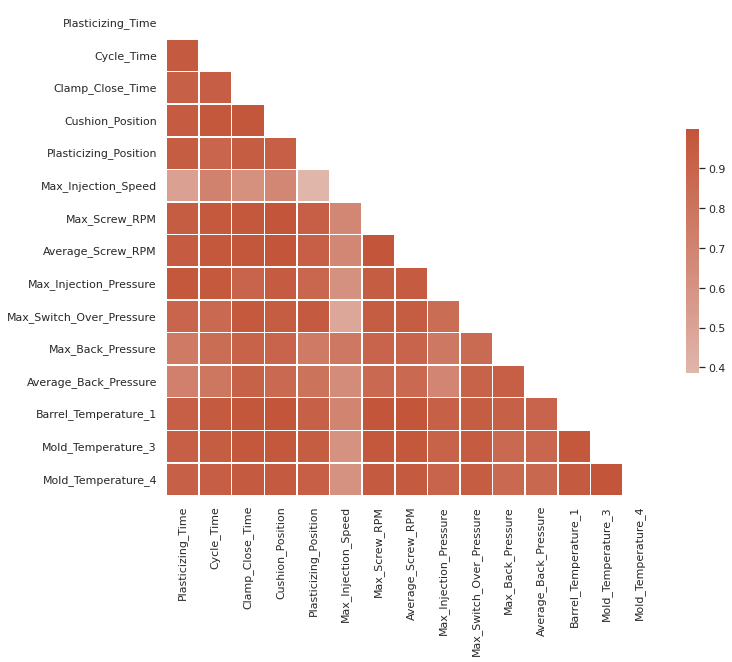

In [15]:
CN7_rev_corr = CN7_rev.corr()

draw_seaborn_corr(CN7_rev_corr)

### **박스플롯**

In [16]:
def draw_box(data):
    fig, axes = plt.subplots(8, 3, figsize=(12, 32))
    k = 0
    for i in range(8): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
            axes[i,j].boxplot(data[list(data)[k]])
            axes[i, j].set_title(list(data)[k])
            k += 1

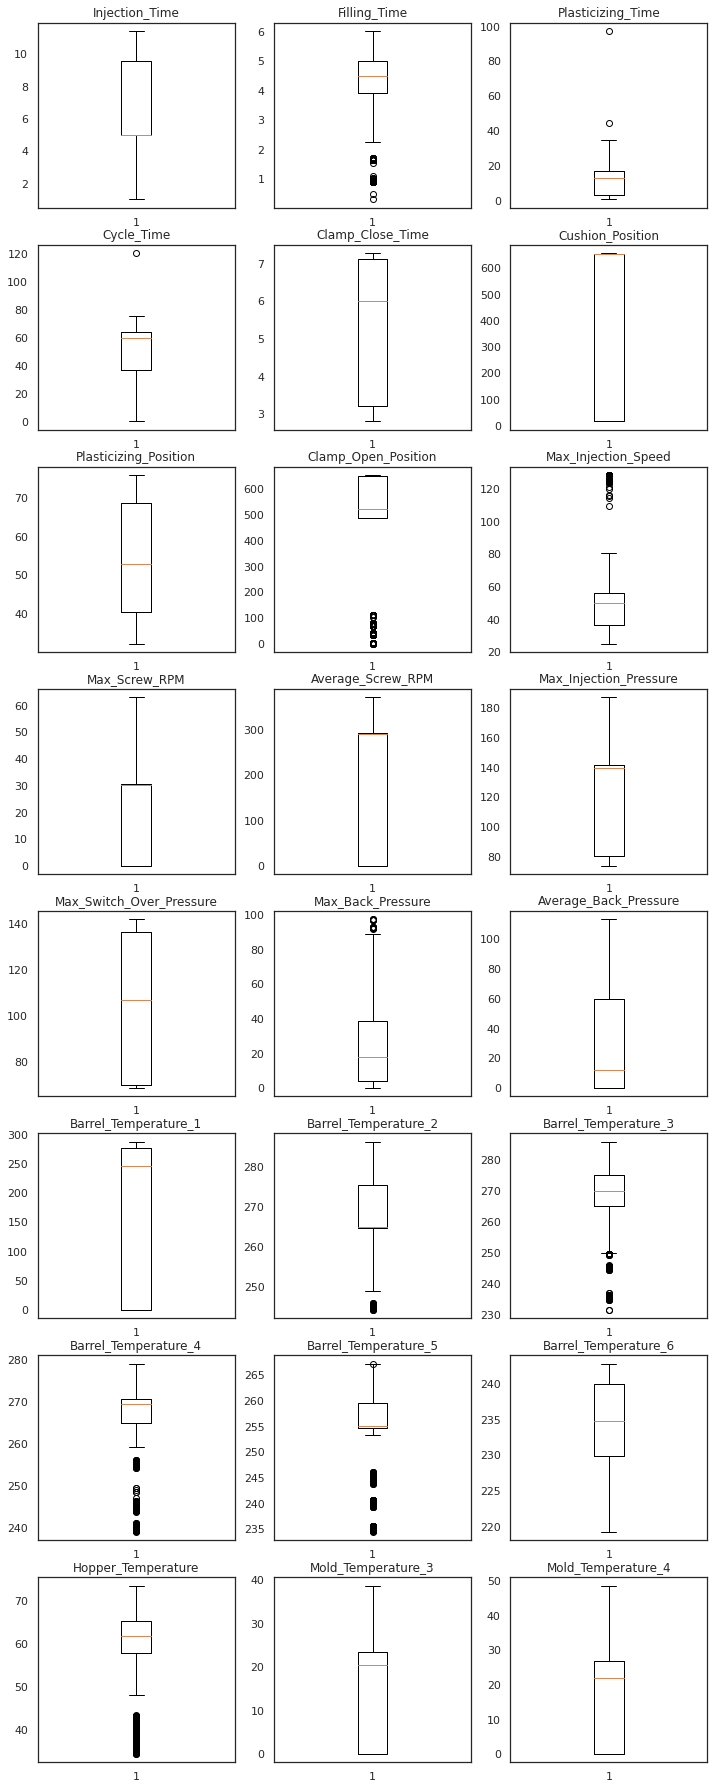

In [17]:
draw_box(CN7)

In [18]:
def draw_box_2(data):
    fig, axes = plt.subplots(5, 3, figsize=(12, 20))
    k = 0
    for i in range(5): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
            axes[i,j].boxplot(data[list(data)[k]])
            axes[i, j].set_title(list(data)[k])
            k += 1

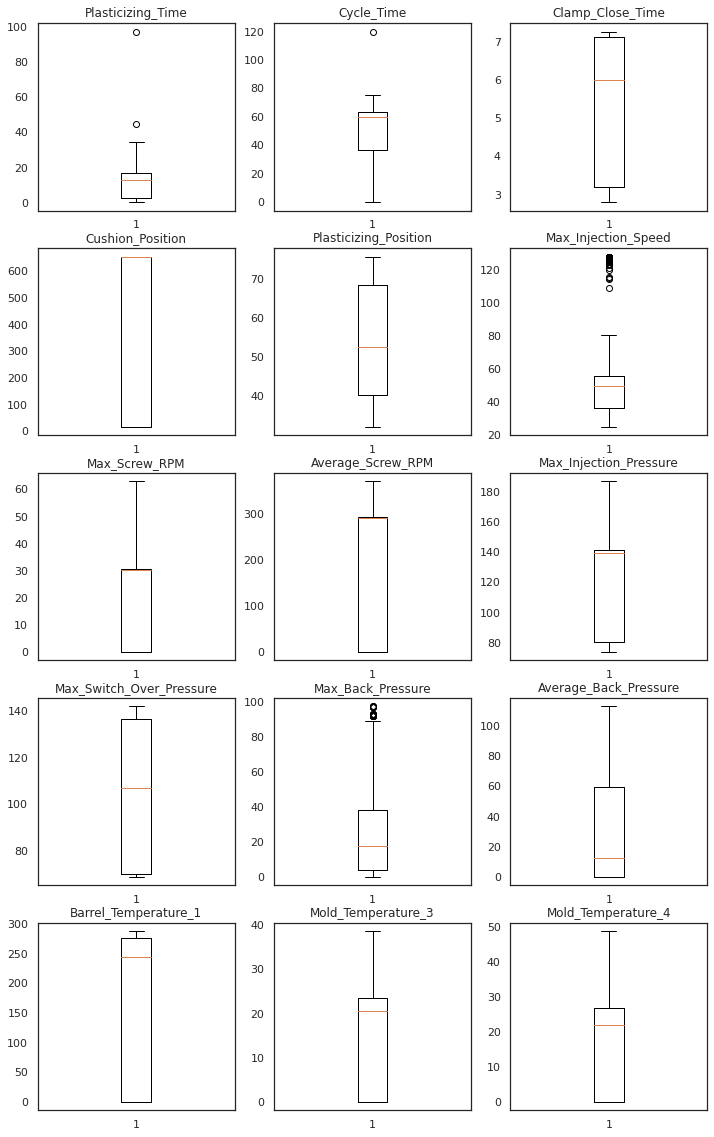

In [19]:
draw_box_2(CN7_rev)

### **바이올린 플롯**

In [20]:
def draw_violin(data):
    fig, axes = plt.subplots(8, 3, figsize=(12, 32))
    k = 0
    for i in range(8): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
          axes[i, j].violinplot(data[list(data)[k]])
          axes[i, j].set_title(list(data)[k])
          k += 1

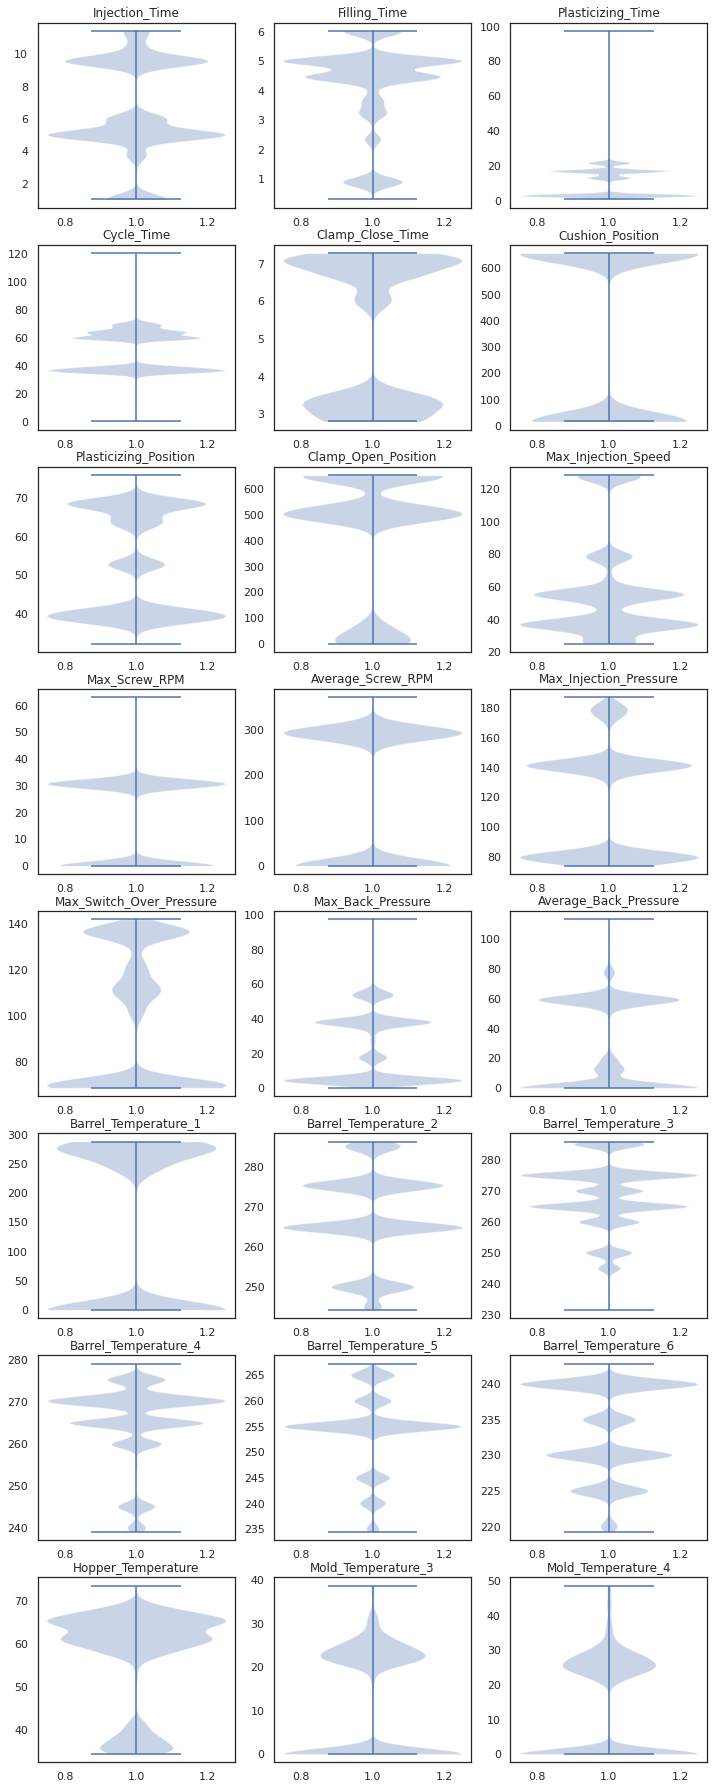

In [21]:
draw_violin(CN7)

In [22]:
def draw_violin_2(data):
    fig, axes = plt.subplots(5, 3, figsize=(12, 20))
    k = 0
    for i in range(5): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
            axes[i,j].violinplot(data[list(data)[k]])
            axes[i, j].set_title(list(data)[k])
            k += 1

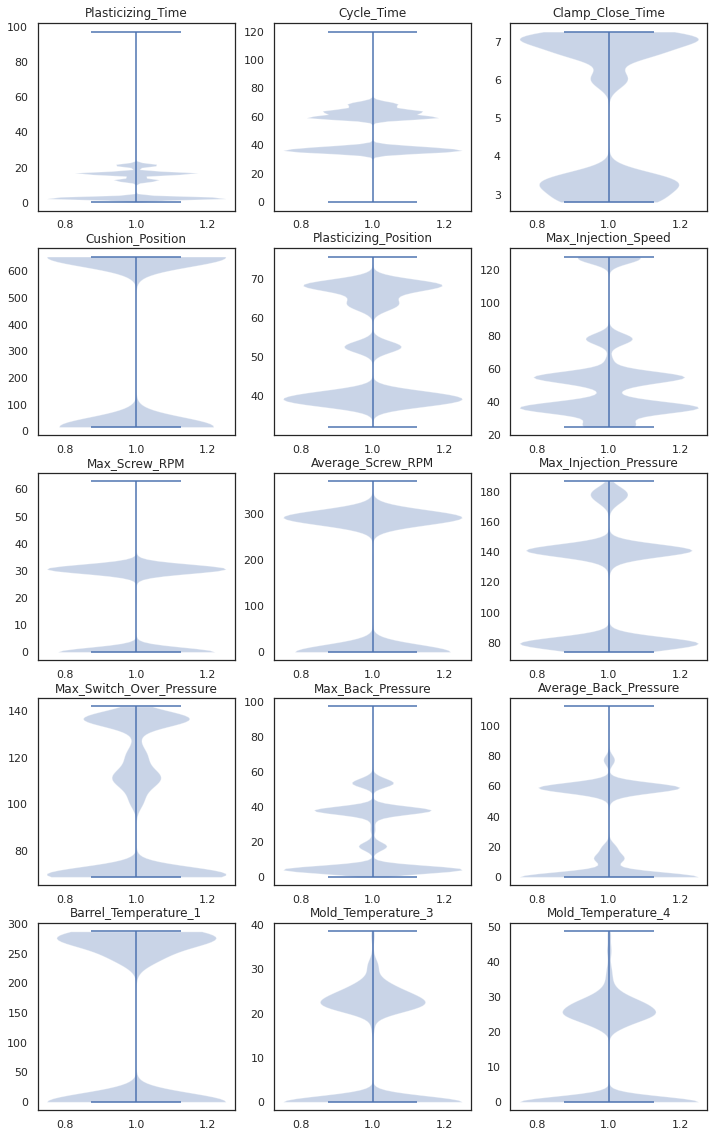

In [23]:
draw_violin_2(CN7_rev)

### **라인 플롯**

In [24]:
def draw_line(data):
    fig, axes = plt.subplots(8, 3, figsize=(12, 32))
    k = 0
    for i in range(8): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
          axes[i, j].plot(data[list(data)[k]])
          axes[i, j].set_title(list(data)[k])
          k += 1

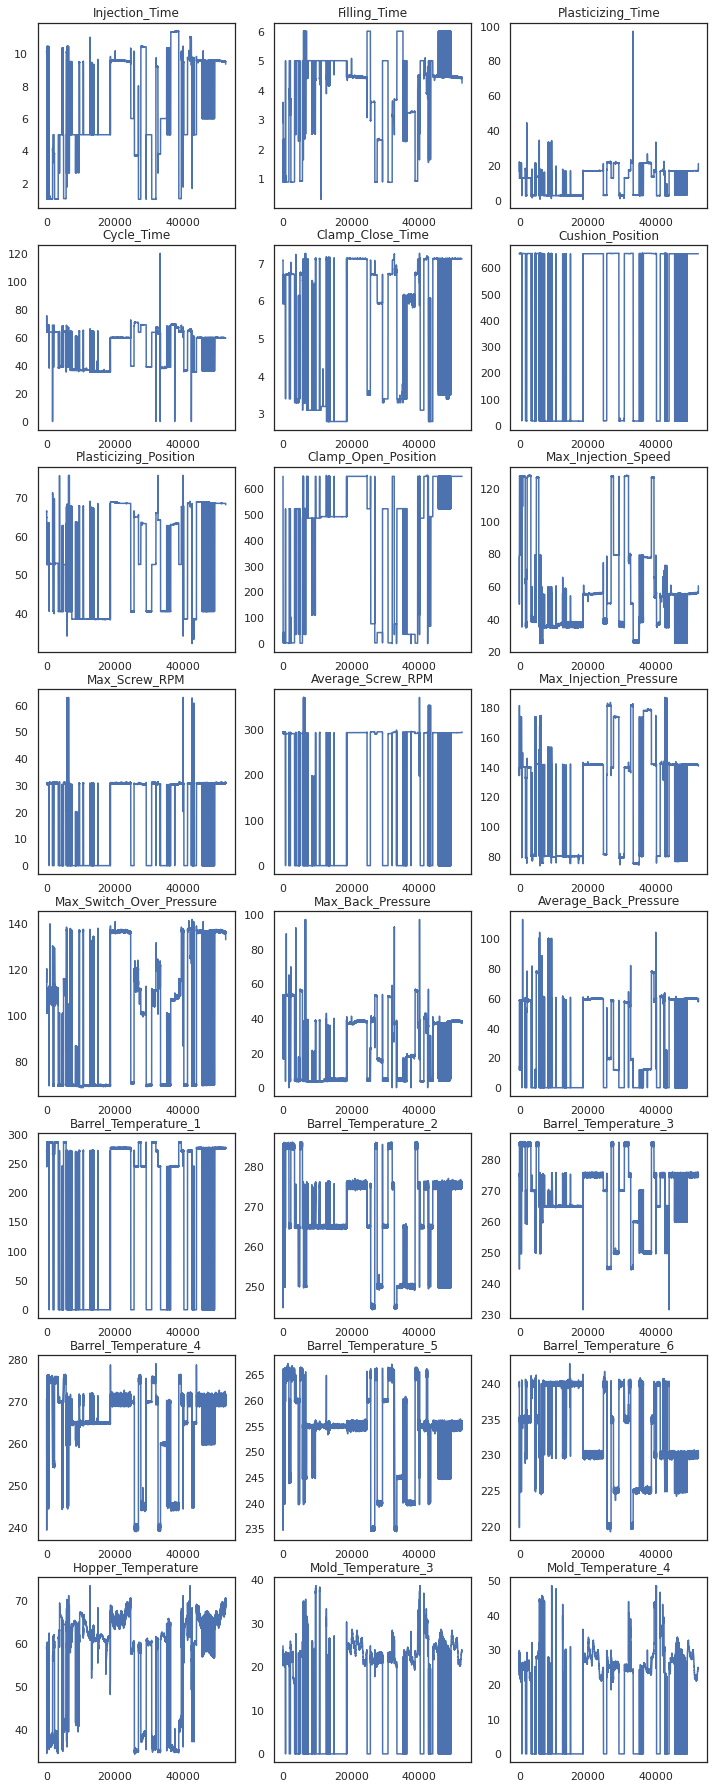

In [25]:
draw_line(CN7)